In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Configuration
n_users = 1000
start_date = "2019-01-01"
end_date = "2024-12-31"
user_ids = [f"user_{i:04d}" for i in range(1, n_users + 1)]

# Create empty dataframe for the full date range
full_dates = pd.date_range(start=start_date, end=end_date, freq="D")
salary_df = pd.DataFrame(index=full_dates)

# Assign a random preferred salary day (1-28) to each user
np.random.seed(42)
preferred_days = np.random.randint(1, 29, size=n_users)
user_day_map = dict(zip(user_ids, preferred_days))

# Function to get adjusted salary date
def get_salary_date(year, month, preferred_day):
    try:
        date = datetime(year, month, preferred_day)
    except:
        return None  # In case invalid date like Feb 30
    # If it's weekend, shift to previous Friday
    while date.weekday() >= 5:  # 5=Saturday, 6=Sunday
        date -= timedelta(days=1)
    return date

# Populate salary indicator
for user_id in user_ids:
    user_col = []
    user_day = user_day_map[user_id]
    salary_dates = set()
    
    for year in range(2019, 2025):
        for month in range(1, 13):
            salary_date = get_salary_date(year, month, user_day)
            if salary_date and salary_date >= full_dates[0] and salary_date <= full_dates[-1]:
                salary_dates.add(salary_date)
    
    # Create 1s where salary is paid
    indicator = [1 if d in salary_dates else 0 for d in full_dates]
    salary_df[user_id] = indicator

# Save to CSV
salary_df.index.name = "date"
salary_df.to_csv("salary_indicator.csv")
print("✅ Salary dataset created as salary_indicator.csv")

/var/folders/8g/y90dcmtn1t39t7rwgnkvjspm0000gn/T/ipykernel_41219/2442471208.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  salary_df[user_id] = indicator
/var/folders/8g/y90dcmtn1t39t7rwgnkvjspm0000gn/T/ipykernel_41219/2442471208.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  salary_df[user_id] = indicator
/var/folders/8g/y90dcmtn1t39t7rwgnkvjspm0000gn/T/ipykernel_41219/2442471208.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

✅ Salary dataset created as salary_indicator.csv


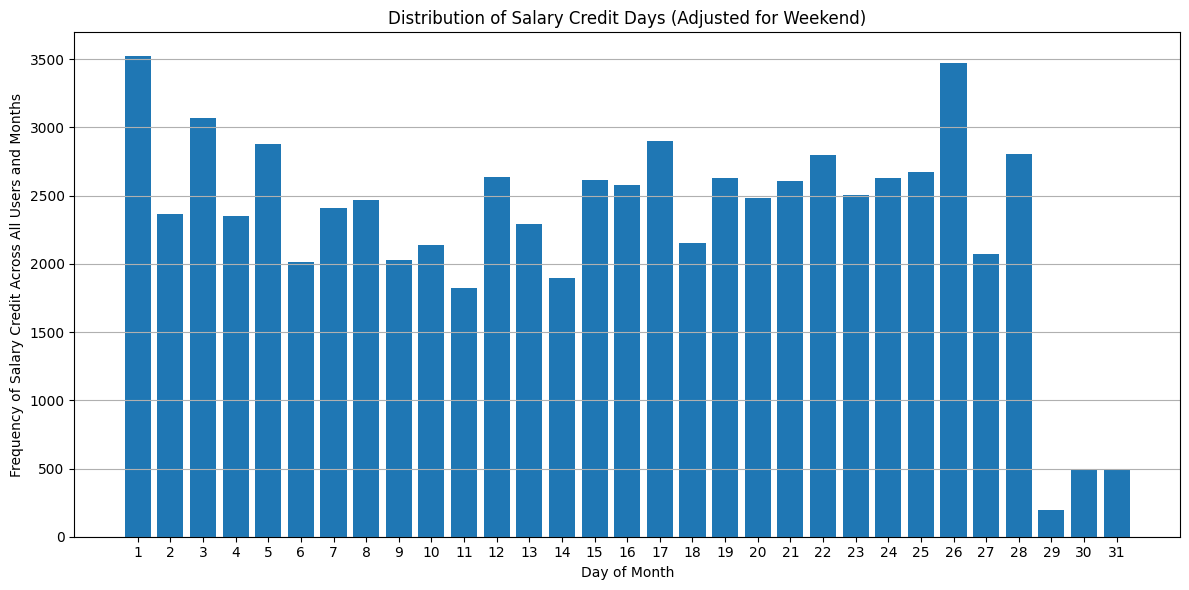

In [4]:
import matplotlib.pyplot as plt 

salary_long = salary_df.stack().reset_index()
salary_long.columns = ["date", "user", "indicator"]
salary_long = salary_long[salary_long["indicator"] == 1]
salary_long["day_of_month"] = salary_long["date"].dt.day

# Count frequency of salary credited on each day of the month
salary_day_distribution = salary_long["day_of_month"].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(salary_day_distribution.index, salary_day_distribution.values)
plt.xlabel("Day of Month")
plt.ylabel("Frequency of Salary Credit Across All Users and Months")
plt.title("Distribution of Salary Credit Days (Adjusted for Weekend)")
plt.xticks(range(1, 32))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [2]:
salary_df.columns

Index(['user_0001', 'user_0002', 'user_0003', 'user_0004', 'user_0005',
       'user_0006', 'user_0007', 'user_0008', 'user_0009', 'user_0010',
       ...
       'user_0991', 'user_0992', 'user_0993', 'user_0994', 'user_0995',
       'user_0996', 'user_0997', 'user_0998', 'user_0999', 'user_1000'],
      dtype='object', length=1000)

In [9]:
datetime(2025, 5, 19).weekday()

0

In [10]:
salary_df.shape

(2192, 1000)

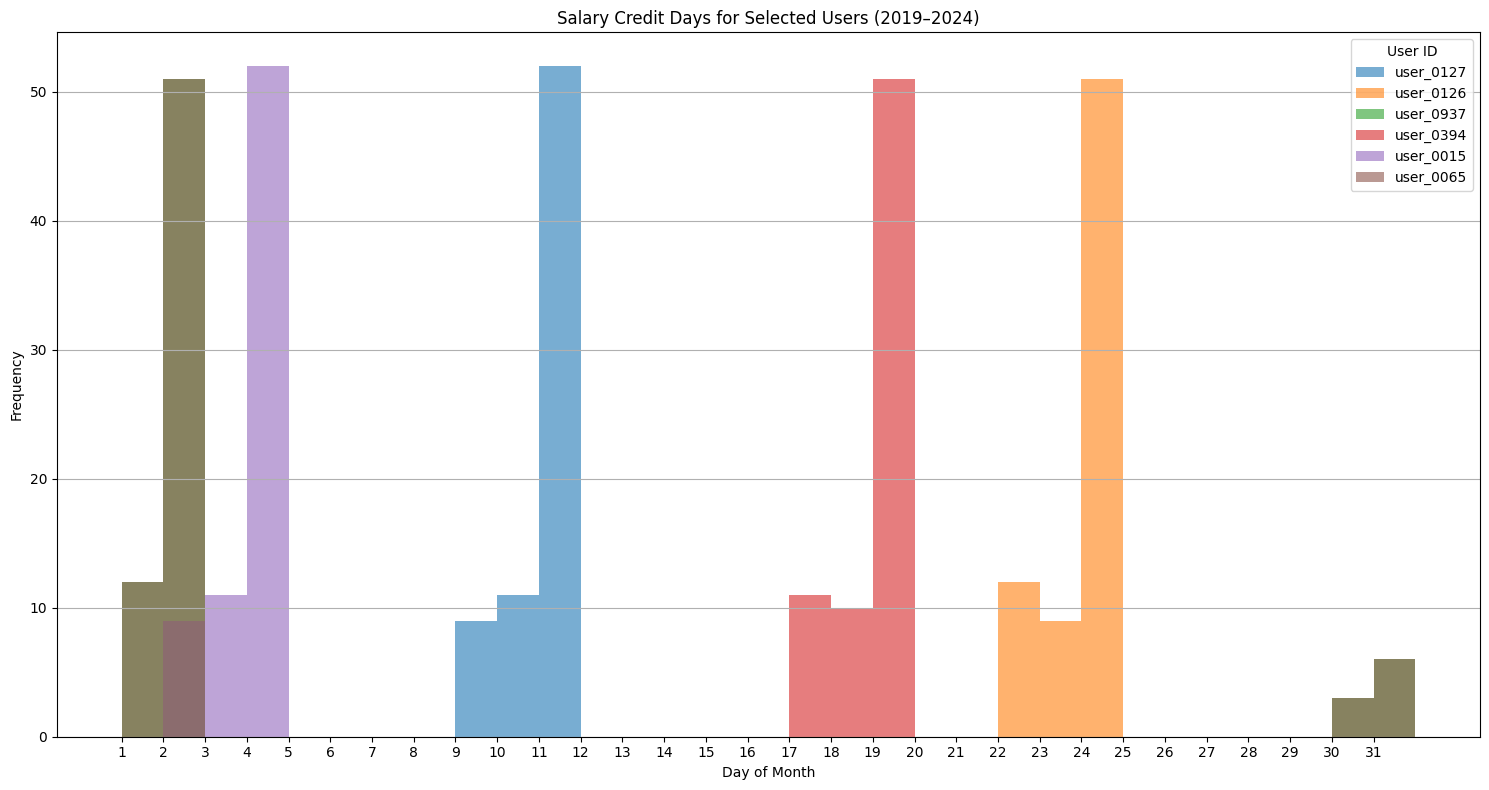

In [15]:
import random

'''
This is the function to randomly check the dates for the indicator.
'''
def plot_salary_dates_for_users(salary_df, user_ids, n_users=5):
    if user_ids is None:
        user_ids = random.sample(list(salary_df.columns), n_users)
    
    plt.figure(figsize=(15, 8))
    
    for user_id in user_ids:
        salary_dates = salary_df[salary_df[user_id] == 1].index
        days = salary_dates.day
        plt.hist(days, bins=np.arange(1, 33), alpha=0.6, label=user_id)

    plt.xlabel("Day of Month")
    plt.ylabel("Frequency")
    plt.title("Salary Credit Days for Selected Users (2019–2024)")
    plt.legend(title="User ID")
    plt.xticks(range(1, 32))
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_salary_dates_for_users(salary_df, user_ids=None, n_users=6)

In [16]:
GLOBAL_HOLIDAYS = {
    datetime(y, 1, 1) for y in range(2019, 2025)
}.union({
    datetime(y, 12, 25) for y in range(2019, 2025)
})

In [17]:
GLOBAL_HOLIDAYS

{datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 12, 25, 0, 0),
 datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 12, 25, 0, 0),
 datetime.datetime(2021, 1, 1, 0, 0),
 datetime.datetime(2021, 12, 25, 0, 0),
 datetime.datetime(2022, 1, 1, 0, 0),
 datetime.datetime(2022, 12, 25, 0, 0),
 datetime.datetime(2023, 1, 1, 0, 0),
 datetime.datetime(2023, 12, 25, 0, 0),
 datetime.datetime(2024, 1, 1, 0, 0),
 datetime.datetime(2024, 12, 25, 0, 0)}

In [18]:
user_day_map

{'user_0001': 7,
 'user_0002': 20,
 'user_0003': 15,
 'user_0004': 11,
 'user_0005': 8,
 'user_0006': 21,
 'user_0007': 7,
 'user_0008': 26,
 'user_0009': 19,
 'user_0010': 23,
 'user_0011': 11,
 'user_0012': 11,
 'user_0013': 24,
 'user_0014': 21,
 'user_0015': 4,
 'user_0016': 8,
 'user_0017': 24,
 'user_0018': 3,
 'user_0019': 22,
 'user_0020': 21,
 'user_0021': 2,
 'user_0022': 24,
 'user_0023': 12,
 'user_0024': 6,
 'user_0025': 2,
 'user_0026': 28,
 'user_0027': 21,
 'user_0028': 1,
 'user_0029': 12,
 'user_0030': 26,
 'user_0031': 22,
 'user_0032': 12,
 'user_0033': 25,
 'user_0034': 17,
 'user_0035': 27,
 'user_0036': 27,
 'user_0037': 10,
 'user_0038': 28,
 'user_0039': 28,
 'user_0040': 16,
 'user_0041': 15,
 'user_0042': 15,
 'user_0043': 19,
 'user_0044': 12,
 'user_0045': 23,
 'user_0046': 20,
 'user_0047': 25,
 'user_0048': 3,
 'user_0049': 5,
 'user_0050': 19,
 'user_0051': 7,
 'user_0052': 21,
 'user_0053': 9,
 'user_0054': 7,
 'user_0055': 18,
 'user_0056': 4,
 'user_0